Elektrotehnički fakultet Beograd <br>
## <font color='blue'>Računarsko modelovanje fizičkih pojava </font>
# MODELI PROTOKA SAOBRAĆAJA (1)
## 13.04.2021. 

Ana Zoric 0009/2020

***
<font color='red'>
Preimenovati svesku: File/Rename u __saobracaj1_ime_prezime__<br>
Redovno snimati aktuelnu verziju sveske: File/Save and Checkpoint <br>
Snimati fajl: Download as Notebook (.ipynb) </font>
***

#### __Zadatak 1__: Model sa konstantnom brzinom
Simulirati model protoka saobraćaja sa konstantnom brzinom koji je modelovan parcijalnom diferencijalnom jednačinom:

\begin{equation}
    \frac{\partial\rho(x,t)}{\partial t} + v\frac{\partial\rho(x,t)}{\partial x} = 0
\end{equation}

a) Formirati Python skriptu koja primenom metode konačnih razlika rešava gornju jednačinu za sledeće parametre:
<br>
<ul>
    <li> Brzina automobila $v = 60$ km/h,</li>
    <li> Ukupna dužina posmatranog puta $L = 5$ km,</li>
    <li> Vremenski domen za rešavanje $T = 180$ sekundi,</li>
    <li> Koraci diskretizacije: $\Delta x = 50$ m, $\Delta t = 0.1$ s.</li>
</ul>
Za rešavanje jednačine potrebno je poznavanje početnog uslova:

<ul>
    <li>$\rho(x,0) = 200$ $\text{km}^{-1}$ za $x \leq 0$,</li>
    <li>$\rho(x,0) = 0$ $\text{km}^{-1}$ za $x > 0$,</li>
</ul>

koji može imati smisao semafora koji u trenutku $t = 0$ na poziciji $x = 0$ uključuje zeleno svetlo.

Dodatno potrebno je i poznavanje graničnog uslova $\rho(0,t) = 200$ $\text{km}^{-1}$ za $t > 0$. 

Prikazati 3D grafik i konturni grafik funkcije $\rho(x,t)$. Šta je posledica konstatne brzine vozila?

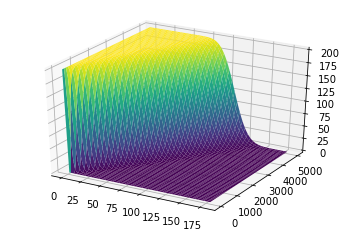

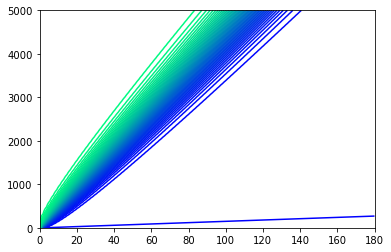

In [27]:
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

v=60/18*5; L=5*1000; T=180
dx=50; dt=0.1

n = int(L/dx)-1
m = int(T/dt)-1
mat = np.zeros((n, m))
mat[0, 0] = 200
for i in range(1, n):
    mat[i, 0] = 0
for i in range(1, m):
    mat[0, i] = 200
for x in range(1, n):
    for t in range(m-1):
        mat[x, t+1]=mat[x, t]-(v*dt)/dx*(mat[x, t]-mat[x-1, t])

x = np.linspace(0, L, m)
y = np.linspace(0, T, n)
X, Y = np.meshgrid(y, x)
fig = plt.figure(0)
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, np.transpose(mat), cmap='viridis', linewidth=0, antialiased=True)
fig2 = plt.figure(1)
ax2 = fig2.gca()
ax2.contour(X, Y, np.transpose(mat), 50, cmap='winter')


plt.show()

Posledica konstantne brzine vozila je da povrsina na grafiku prilikom spustanja ostane ravna

b) Modelovati isti problem kao iz tačke a) kod koga je promenjen granični uslov, odnosno pretpostavljeno je da postoji semafor koji u trenutku $t = 60$ s uključuje crveno svetlo, a onda u trenutku $t = 120$ s, uključuje zeleno svetlo:
<ul>
    <li> $\rho(0,t) = 200$ $\text{km}^{-1}$ za $0 \leq t < 60$ i $t \geq 120$,</li>
    <li> $\rho(0,t) = 0$ $\text{km}^{-1}$ za $60 \leq t < 120$.</li>
</ul>

Prikazati 3D grafik i konturni grafik funkcije $\rho(x,t)$. Kako je promenjeni granični uslov uticao na rešenje?

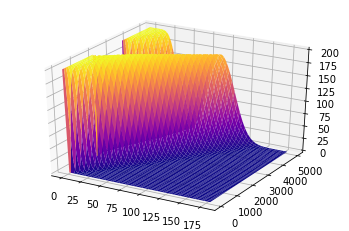

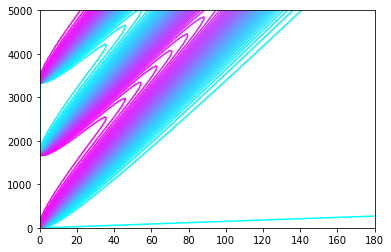

In [20]:
mat = np.zeros((n, m))
mat[0, 0] = 200
for i in range(1, n):
    mat[i, 0] = 0
for i in range(1, m):
    if i < 600 or i > 1200:
        mat[0, i] = 200
    else:
        mat[0, i] = 0

for x in range(1, n):
    for t in range(m-1):
        mat[x, t+1] = mat[x, t]-(v*dt)/dx*(mat[x, t]-mat[x-1, t])

x = np.linspace(0, L, m)
y = np.linspace(0, T, n)
X, Y = np.meshgrid(y, x)
fig = plt.figure(0)
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, np.transpose(mat), cmap='plasma', linewidth=0, antialiased=True)
fig2 = plt.figure(1)
ax2 = fig2.gca()
ax2.contour(X, Y, np.transpose(mat), 50, cmap='cool')
plt.show()

Zbog promenjenog uslova je sada iza povrsine koja se spusta jedna rupa, zbog toga sto je semafor u tom trenutku pustao automobile, a na proslom grafiku ih je zaustavljao.